## Modelos Supervisionados - Classificação
Vamos treinar 5 algorítmos diferentes:
- Naive Bayes (Gaussiano)
- Regressão Logística
- Decision Tree
- Random Forest
- Gradient Boosting

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

#### Lendo ABT tratada

In [2]:
abt = pd.read_csv('ABT_credit_DataPrep_Train2.csv')
abt.drop('Unnamed: 0',inplace=True,axis=1)
abt.drop('index',inplace=True,axis=1)
abt.shape

(246008, 1309)

In [3]:
abt.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,LE_ORGANIZATION_TYPE,LE_OCCUPATION_TYPE,TARGET
0,-0.577070,-0.389334,-0.873727,-1.015307,-0.788356,0.757196,-0.398583,-0.465455,-1.242846,1.118666,...,0,0,0,0,0,0,0,39,3,0
1,-0.577070,0.526882,1.341271,0.435346,1.235588,1.834571,-1.002025,2.129459,-0.969264,-0.147453,...,0,0,0,1,0,0,0,11,4,0
2,-0.577070,0.042843,-0.533866,-0.507160,-0.617662,1.834571,-1.104280,2.129459,1.188462,-0.209038,...,0,0,0,1,0,0,0,5,11,0
3,0.805097,0.129279,-0.163547,0.361248,-0.361621,0.311154,0.836730,-0.475416,-0.432032,-0.209700,...,0,0,0,0,1,0,0,30,10,0
4,0.805097,0.016913,1.865822,0.851723,2.198791,-0.161297,-0.044130,-0.459552,1.053658,-1.034796,...,0,0,0,1,0,0,0,40,16,0


### Separar a Classe das variáveis explicativas

In [4]:
X = abt.drop(['TARGET'], axis=1)
y = abt["TARGET"]

### FEATURE SELECTION

In [5]:
# Building the model
forest = RandomForestClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 100) 

forest = forest.fit(X, y)
  
# Computing the importance of each feature 
feature_importance = forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        forest.estimators_], 
                                        axis = 0) 



In [6]:
importancias = forest.feature_importances_.tolist()
importancias_df = pd.DataFrame(importancias, columns=["importancias"])
importancias_df

variaveis = X.columns.tolist()
variaveis_df = pd.DataFrame(variaveis, columns=["variaveis"])
variaveis_df

var_imp = pd.merge(variaveis_df,importancias_df, left_index=True, right_index=True)
var_imp

,variaveis,importancias
0,CNT_CHILDREN,0.002494
1,AMT_INCOME_TOTAL,0.009272
2,AMT_CREDIT,0.013111
3,AMT_ANNUITY,0.013200
4,AMT_GOODS_PRICE,0.011788
...,...,...
1303,"WALLSMATERIAL_MODE_Stone, brick",0.001530
1304,WALLSMATERIAL_MODE_Wooden,0.000477
1305,EMERGENCYSTATE_MODE_Yes,0.000265
1306,LE_ORGANIZATION_TYPE,0.007750


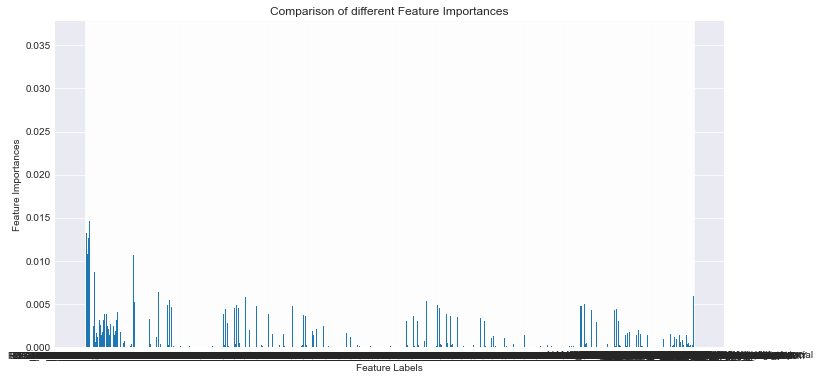

In [7]:
# Plotting a Bar Graph to compare the models 
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))
plt.bar(X.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [9]:
var_imp_sel = var_imp[(var_imp.importancias  >= 0.005)]
print(var_imp_sel)
print(var_imp_sel.shape)

                                   variaveis  importancias
1                           AMT_INCOME_TOTAL      0.009272
2                                 AMT_CREDIT      0.013111
3                                AMT_ANNUITY      0.013200
4                            AMT_GOODS_PRICE      0.011788
5                 REGION_POPULATION_RELATIVE      0.010838
6                                 DAYS_BIRTH      0.016723
7                              DAYS_EMPLOYED      0.012660
8                          DAYS_REGISTRATION      0.013050
9                            DAYS_ID_PUBLISH      0.014617
10                               OWN_CAR_AGE      0.005625
20                   HOUR_APPR_PROCESS_START      0.008679
27                              EXT_SOURCE_1      0.015794
28                              EXT_SOURCE_2      0.035988
29                              EXT_SOURCE_3      0.024849
77                    DAYS_LAST_PHONE_CHANGE      0.012019
104                          AVG_DAYS_CREDIT      0.0106

In [10]:
X = X[var_imp_sel.variaveis.tolist()]
#x_test = x_test[var_imp_sel.variaveis.tolist()]
X

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,AVG_AMT_CREDIT_SUM,AVG_AMT_CREDIT_SUM_CLOSED,SUM_AMT_CREDIT_SUM_CURRENCY1,MIN_AMT_CREDIT_SUM_CURRENCY1,SUM_AMT_CREDIT_SUM_DEBT_SUMCREDITCARD,AVG_DAYS_CREDIT_UPDATE_CURRENCY1,AVG_DAYS_CREDIT_UPDATE_CONSUMERCREDIT,MIN_DAYS_CREDIT_UPDATE,LE_ORGANIZATION_TYPE,LE_OCCUPATION_TYPE
0,-0.389334,-0.873727,-1.015307,-0.788356,0.757196,-0.398583,-0.465455,-1.242846,1.118666,-2.554148e-16,...,-3.047704e-01,-1.086047e-01,-4.013958e-01,-0.010357,-1.856680e-01,-0.138595,4.969608e-02,-0.393999,39,3
1,0.526882,1.341271,0.435346,1.235588,1.834571,-1.002025,2.129459,-0.969264,-0.147453,1.365296e-01,...,7.707803e-17,-5.885728e-17,1.253182e-16,0.000000,1.523451e-16,0.000000,-2.974489e-16,0.000000,11,4
2,0.042843,-0.533866,-0.507160,-0.617662,1.834571,-1.104280,2.129459,1.188462,-0.209038,-2.554148e-16,...,7.707803e-17,-5.885728e-17,1.253182e-16,0.000000,1.523451e-16,0.000000,-2.974489e-16,0.000000,5,11
3,0.129279,-0.163547,0.361248,-0.361621,0.311154,0.836730,-0.475416,-0.432032,-0.209700,-2.554148e-16,...,-3.122583e-02,-7.670282e-02,-4.424106e-02,-0.265115,1.152987e+00,-0.667900,-7.355605e-01,-0.406337,30,10
4,0.016913,1.865822,0.851723,2.198791,-0.161297,-0.044130,-0.459552,1.053658,-1.034796,3.156030e+00,...,-1.500069e-01,-2.453662e-01,-9.389469e-02,-0.265115,-4.738686e-01,-0.997618,-9.384091e-01,-0.378575,40,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,-0.130027,-0.482363,-0.472746,-0.361621,-0.084967,0.245210,-0.453811,-0.159017,-0.371276,-2.554148e-16,...,-4.258375e-01,-2.070457e-01,-4.602206e-01,-0.179842,-4.738686e-01,0.108889,3.333649e-01,-0.427930,57,8
246004,-0.216463,-0.929636,-0.231229,-0.849318,-0.010879,0.650791,-0.477169,0.125350,-0.359356,-2.554148e-16,...,2.210450e-01,1.848023e-01,6.565007e-02,-0.145369,1.975552e-01,-0.660209,-5.849874e-01,-0.393999,42,0
246005,-0.389334,-0.782036,-0.764799,-0.849318,-0.810789,-1.856748,2.129459,-0.958195,-0.567286,-2.554148e-16,...,7.707803e-17,-5.885728e-17,1.253182e-16,0.000000,1.523451e-16,0.000000,-2.974489e-16,0.000000,42,14
246006,-0.043592,-0.739545,-0.666518,-0.642047,0.564309,0.151667,-0.453960,-0.262320,-0.926196,-1.157542e+00,...,-5.291727e-02,-1.757284e-01,-6.628310e-02,-0.174397,-4.738686e-01,-0.854376,-7.957375e-01,-0.415591,5,14


# Treinando modelos 

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc



classificadores = []

classifiers = [
LogisticRegression(max_iter=1000,random_state=15),
SGDClassifier(max_iter=1000, loss='log_loss', tol=0.0001, penalty=None, eta0=0.5, random_state=15),
DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=15),
DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=15),
DecisionTreeClassifier(max_depth=7, criterion='gini', random_state=15),
DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=15),
DecisionTreeClassifier(max_depth=11, criterion='gini', random_state=15),
RandomForestClassifier(n_estimators=500, criterion= 'gini', max_depth=3, random_state=15),
RandomForestClassifier(n_estimators=500, criterion= 'gini', max_depth=5, random_state=15),
RandomForestClassifier(n_estimators=500, criterion= 'gini', max_depth=7, random_state=15),
RandomForestClassifier(n_estimators=500, criterion= 'gini', max_depth=9, random_state=15),
RandomForestClassifier(n_estimators=500, criterion= 'gini', max_depth=11, random_state=15),
GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=100,criterion='friedman_mse',max_depth=3,tol=0.0001),
GradientBoostingClassifier(loss='deviance',learning_rate=0.01,n_estimators=100,criterion='friedman_mse',max_depth=3,tol=0.0001),
GradientBoostingClassifier(loss='deviance',learning_rate=0.001,n_estimators=100,criterion='friedman_mse',max_depth=3,tol=0.0001)
]

name_class = [
'Regressão Logística',
'Gradiente Descendente',
'Árvore de Decisão (depth=3)',
'Árvore de Decisão (depth=5)',
'Árvore de Decisão (depth=7)',
'Árvore de Decisão (depth=9)',
'Árvore de Decisão (depth=11)',
'Random Forest (depth=3)',
'Random Forest (depth=5)',
'Random Forest (depth=7)',
'Random Forest (depth=9)',
'Random Forest (depth=11)',
'Gradiente Boosting (0.1)',
'Gradiente Boosting (0.01)',
'Gradiente Boosting (0.001)'
]

name_class = pd.DataFrame(name_class, columns=['NOME'])


for clf in classifiers:
    model = Pipeline([
        ("classifiers",clf)])
    classificador = clf
    fitter = model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    y_pred_train = model.predict(x_train)
    y_score_train = model.predict_proba(x_train)
    y_pred_valid = model.predict(x_test)
    y_score_valid = model.predict_proba(x_test)
    acuracia_train = round(accuracy_score(y_pred_train, y_train) * 100, 2)
    acuracia_valid = round(accuracy_score(y_pred_valid, y_test) * 100, 2)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_score_train[:,1])
    roc_auc_train = 100*round(auc(fpr_train, tpr_train), 2)
    gini_train = 100*round((2*roc_auc_train/100 - 1), 2)
    fpr_valid, tpr_valid, thresholds = roc_curve(y_test, y_score_valid[:,1])
    roc_auc_valid = 100*round(auc(fpr_valid, tpr_valid), 2)
    gini_valid = 100*round((2*roc_auc_valid/100 - 1), 2)

    
    
    
    classificadores.append([acuracia_train, acuracia_valid,roc_auc_train,
                            roc_auc_valid, gini_train, gini_valid])
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [14]:
pd.set_option('display.max_colwidth', None)
classificadores = pd.DataFrame(classificadores, 
                               columns=['ACCURACY_TRAIN', 'ACCURACY_VALID',
                                        'ROC_AUC_TRAIN','ROC_AUC_VALID','GINI_TRAIN',
                                        'GINI_VALID'])

preditores = pd.merge(name_class,classificadores, left_index=True, right_index=True)

preditores['DELTA_AUC'] = preditores['ROC_AUC_TRAIN'] - preditores['ROC_AUC_VALID']
preditores['DELTA_GINI'] = preditores['GINI_TRAIN'] - preditores['GINI_VALID']



display(preditores.sort_values(by='ROC_AUC_VALID', ascending=False))

,NOME,ACCURACY_TRAIN,ACCURACY_VALID,ROC_AUC_TRAIN,ROC_AUC_VALID,GINI_TRAIN,GINI_VALID,DELTA_AUC,DELTA_GINI
12,Gradiente Boosting (0.1),91.98,92.01,76.0,75.0,52.0,50.0,1.0,2.0
10,Random Forest (depth=9),91.90,91.99,80.0,74.0,60.0,48.0,6.0,12.0
11,Random Forest (depth=11),91.98,92.00,86.0,74.0,72.0,48.0,12.0,24.0
0,Regressão Logística,91.90,91.98,73.0,73.0,46.0,46.0,0.0,0.0
1,Gradiente Descendente,91.89,91.97,72.0,73.0,44.0,46.0,-1.0,-2.0
9,Random Forest (depth=7),91.90,91.99,76.0,73.0,52.0,46.0,3.0,6.0
4,Árvore de Decisão (depth=7),91.97,91.90,73.0,72.0,46.0,44.0,1.0,2.0
8,Random Forest (depth=5),91.90,91.99,73.0,72.0,46.0,44.0,1.0,2.0
13,Gradiente Boosting (0.01),91.90,91.99,72.0,72.0,44.0,44.0,0.0,0.0
3,Árvore de Decisão (depth=5),91.91,91.99,71.0,71.0,42.0,42.0,0.0,0.0


# Ajustar corte do score

In [15]:
# Logistic Regressor

model = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.1,
                                   n_estimators=100,
                                   criterion='friedman_mse',
                                   max_depth=3,tol=0.0001)

model.fit(x_train, y_train)

#abt_scored = abt.copy()





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,AVG_AMT_CREDIT_SUM_CLOSED,SUM_AMT_CREDIT_SUM_CURRENCY1,MIN_AMT_CREDIT_SUM_CURRENCY1,SUM_AMT_CREDIT_SUM_DEBT_SUMCREDITCARD,AVG_DAYS_CREDIT_UPDATE_CURRENCY1,AVG_DAYS_CREDIT_UPDATE_CONSUMERCREDIT,MIN_DAYS_CREDIT_UPDATE,LE_ORGANIZATION_TYPE,LE_OCCUPATION_TYPE,Score
87024,-0.130027,-0.269819,-0.645125,-0.361621,-1.137308,-1.330800,2.129459,0.981005,-1.334109,-2.554148e-16,...,-2.341269e-01,-1.955124e-01,-0.228302,3.119875e-01,1.005964,7.792498e-01,-0.403253,5,8,0.938388
114375,-0.302898,-1.058619,-1.019958,-1.032205,1.080097,-1.205618,-0.465611,0.891041,-0.409021,-2.554148e-16,...,-5.885728e-17,1.253182e-16,0.000000,1.523451e-16,0.000000,-2.974489e-16,0.000000,47,14,0.940329
127710,-0.216463,-0.940818,-1.034839,-0.861511,0.564309,1.695350,-0.463299,-1.030280,1.108733,-2.554148e-16,...,-2.969354e-01,-3.627444e-01,1.060584,-4.738686e-01,-1.259513,-1.178253e+00,-0.393999,57,8,0.915999
29076,-0.043592,-0.134384,-0.108455,-0.239696,0.311154,0.440549,-0.456738,1.320145,-0.870572,-2.554148e-16,...,1.661334e-01,9.190346e-02,0.346746,-4.738686e-01,-0.361207,-5.513668e-01,-0.218172,30,8,0.889685
199520,0.215714,1.234719,1.764776,0.979547,0.127455,-0.406379,-0.487569,0.320320,1.478239,-2.554148e-16,...,-1.833782e-02,5.675083e-01,-0.165188,3.456425e+00,0.118662,2.170072e-02,-0.390914,57,8,0.917646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138593,-0.233750,-1.253138,-1.343014,-1.263861,-0.145669,-0.336222,-0.472058,-0.654246,1.330569,-2.554148e-16,...,-9.894764e-02,-1.843832e-01,-0.186134,1.914544e-01,-0.895079,-8.302738e-01,-0.412507,1,0,0.956068
52198,-0.130027,-0.232281,0.030751,-0.276274,-0.983201,0.516896,-0.457629,-0.781956,-0.961955,-7.261847e-01,...,3.389126e-01,-6.187353e-02,-0.265115,-4.738686e-01,-1.129358,-1.187856e+00,-0.347728,42,14,0.951983
123356,-0.337472,-0.193424,0.012459,-0.239696,1.080097,0.983005,-0.466282,-0.052024,0.420711,9.992440e-01,...,-1.607717e-01,3.477017e-01,-0.265115,1.229149e-01,0.393644,4.213279e-01,-0.360067,5,8,0.888577
218997,-0.216463,-0.711546,-0.015444,-0.727394,-1.355084,1.054766,-0.471429,0.617742,-0.192483,-2.554148e-16,...,-2.969354e-01,-1.907775e-01,-0.265115,1.151314e+00,-1.153804,-1.195705e+00,-0.375490,33,10,0.924033


In [21]:
abt_scored = x_test.copy()

abt_scored["Score"] = model.predict_proba(abt_scored)[:,0]
abt_scored["TARGET"] = abt["TARGET"]

#xvars = abt_scored.drop('TARGET',axis=1)

abt_scored

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,SUM_AMT_CREDIT_SUM_CURRENCY1,MIN_AMT_CREDIT_SUM_CURRENCY1,SUM_AMT_CREDIT_SUM_DEBT_SUMCREDITCARD,AVG_DAYS_CREDIT_UPDATE_CURRENCY1,AVG_DAYS_CREDIT_UPDATE_CONSUMERCREDIT,MIN_DAYS_CREDIT_UPDATE,LE_ORGANIZATION_TYPE,LE_OCCUPATION_TYPE,Score,TARGET
87024,-0.130027,-0.269819,-0.645125,-0.361621,-1.137308,-1.330800,2.129459,0.981005,-1.334109,-2.554148e-16,...,-1.955124e-01,-0.228302,3.119875e-01,1.005964,7.792498e-01,-0.403253,5,8,0.938388,0
114375,-0.302898,-1.058619,-1.019958,-1.032205,1.080097,-1.205618,-0.465611,0.891041,-0.409021,-2.554148e-16,...,1.253182e-16,0.000000,1.523451e-16,0.000000,-2.974489e-16,0.000000,47,14,0.940329,0
127710,-0.216463,-0.940818,-1.034839,-0.861511,0.564309,1.695350,-0.463299,-1.030280,1.108733,-2.554148e-16,...,-3.627444e-01,1.060584,-4.738686e-01,-1.259513,-1.178253e+00,-0.393999,57,8,0.915999,1
29076,-0.043592,-0.134384,-0.108455,-0.239696,0.311154,0.440549,-0.456738,1.320145,-0.870572,-2.554148e-16,...,9.190346e-02,0.346746,-4.738686e-01,-0.361207,-5.513668e-01,-0.218172,30,8,0.889685,0
199520,0.215714,1.234719,1.764776,0.979547,0.127455,-0.406379,-0.487569,0.320320,1.478239,-2.554148e-16,...,5.675083e-01,-0.165188,3.456425e+00,0.118662,2.170072e-02,-0.390914,57,8,0.917646,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138593,-0.233750,-1.253138,-1.343014,-1.263861,-0.145669,-0.336222,-0.472058,-0.654246,1.330569,-2.554148e-16,...,-1.843832e-01,-0.186134,1.914544e-01,-0.895079,-8.302738e-01,-0.412507,1,0,0.956068,0
52198,-0.130027,-0.232281,0.030751,-0.276274,-0.983201,0.516896,-0.457629,-0.781956,-0.961955,-7.261847e-01,...,-6.187353e-02,-0.265115,-4.738686e-01,-1.129358,-1.187856e+00,-0.347728,42,14,0.951983,0
123356,-0.337472,-0.193424,0.012459,-0.239696,1.080097,0.983005,-0.466282,-0.052024,0.420711,9.992440e-01,...,3.477017e-01,-0.265115,1.229149e-01,0.393644,4.213279e-01,-0.360067,5,8,0.888577,0
218997,-0.216463,-0.711546,-0.015444,-0.727394,-1.355084,1.054766,-0.471429,0.617742,-0.192483,-2.554148e-16,...,-1.907775e-01,-0.265115,1.151314e+00,-1.153804,-1.195705e+00,-0.375490,33,10,0.924033,0


In [22]:
m_predict = model.predict(x_test)
confusion_matrix(y_test,m_predict)

array([[67827,    68],
       [ 5829,    79]], dtype=int64)

#### Ordenando o score em 10 faixas

In [23]:
df_abc = abt_scored.copy()
df_abc = df_abc[['Score', 'TARGET']]

df_abc['faixa'] = pd.qcut(abt_scored['Score'], 10, labels=False)
#display(df_abc)


df_agr = df_abc.groupby(by='faixa').aggregate('Score').mean()
df_agr = pd.DataFrame(df_agr, columns=["Score"])
df_agr

,Score
faixa,
0,0.750295
1,0.862235
2,0.899722
3,0.921949
4,0.937139
5,0.948375
6,0.957230
7,0.964701
8,0.971604


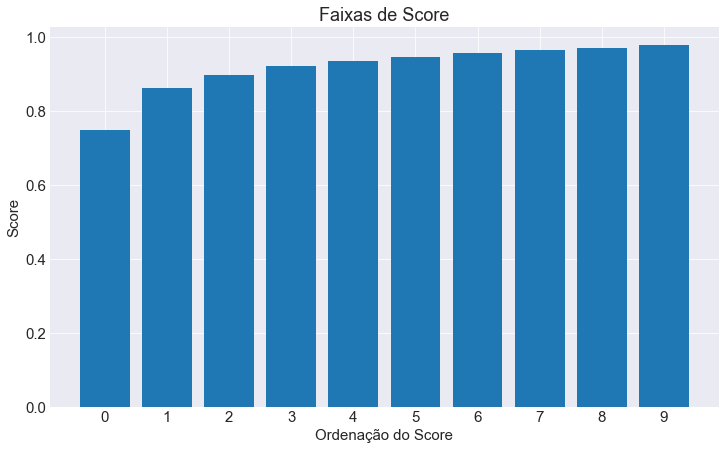

In [24]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = df_agr.Score
bars = df_agr.index
y_pos = np.arange(len(bars))

plt.figure(figsize=(12, 7))
plt.rcParams.update({'font.size': 15})
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# setting label of y-axis
plt.ylabel("Score")
 
# setting label of x-axis
plt.xlabel("Ordenação do Score")
plt.title("Faixas de Score")

# Show graphic
plt.show()

In [25]:
target=[]

for scr in abt_scored.Score:
    if scr <= 0.750295:
        i = 1
        target.append(i)
    else:
        i = 0
        target.append(i)
        


In [26]:
target_df = pd.DataFrame(target, columns=['Target'])
print(target_df.shape)
print(target_df.value_counts()/len(target_df))

(73803, 1)
Target
0         0.963755
1         0.036245
dtype: float64


In [29]:
confusion_matrix(y_test, target_df)

array([[66118,  1777],
       [ 5010,   898]], dtype=int64)

#### O modelo selecionado pra ir pros testes foi o Gradient Boosting

### Dados de Testes

In [30]:
#teste = pd.read_csv('ABT_credit_DataPrep_Test.csv')
#teste.drop('Unnamed: 0',inplace=True,axis=1)
#teste.drop('index',inplace=True,axis=1)
#teste.shape

In [31]:
#X = teste.drop(['TARGET'], axis=1)
#y = teste["TARGET"]

In [32]:
#X = X[var_imp_sel.variaveis.tolist()]
#x_test = x_test[var_imp_sel.variaveis.tolist()]
#X

# Testando os melhores modelos

In [35]:
# GradientBoostingClassifier

#model = GradientBoostingClassifier(loss='deviance',
#                                   learning_rate=0.1,
#                                   n_estimators=100,
#                                   criterion='friedman_mse',
#                                   max_depth=3,tol=0.0001)

#model.fit(x_train, y_train)

# Prever valores para teste
#pred_teste = model.predict(X)

In [36]:
#score = model.predict_proba(X)

In [37]:
#len(pred_teste)

In [38]:
#acuracia = round(accuracy_score(pred_teste, y) * 100, 2)
#fpr, tpr, thresholds = roc_curve(y, score[:,1])
#roc_auc = 100*round(auc(fpr, tpr), 2)
#gini = 100*round((2*roc_auc/100 - 1), 2)

In [39]:
#import matplotlib.pyplot as plt

#plt.style.use('seaborn-darkgrid')
#plt.figure(figsize=(12,6))

#lw = 2

#plt.plot(fpr, tpr, color='green',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc)

#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Falso Positivo', fontsize=15)
#plt.ylabel('Verdadeiro Positivo', fontsize=15)
#plt.legend(loc="lower right")
#plt.legend(fontsize=20) 
#plt.title('Curva ROC - Modelo Home Credit Default Risk Kaggle', fontsize=20)
#plt.show()

#print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acuracia, gini, roc_auc)

In [40]:
#confusion_matrix(y, pred_teste)